In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:

# Assuming the file is in the correct location
file_path = "/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv" 
file_path2 = "/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding="utf-8")
df = pd.read_csv(file_path2, encoding="utf-8")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.shape

(30641, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
#checking for null values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
#removing null values
df.dropna(inplace = True)

In [9]:
#changing float to int in column (NrSiblings)
df["NrSiblings"]= df["NrSiblings"].astype("int")

In [10]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000
mean,501.651769,2.147482,66.635504,69.534324,68.602869
std,289.462867,1.443735,15.362362,14.785547,15.481824
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,251.000000,1.000000,56.000000,59.000000,58.000000
50%,503.000000,2.000000,67.000000,70.000000,69.000000
75%,754.000000,3.000000,78.000000,80.000000,80.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [11]:
# describe MathScore	ReadingScore	WritingScore
df[["MathScore","ReadingScore","WritingScore"]].describe()

,MathScore,ReadingScore,WritingScore
count,19243.000000,19243.000000,19243.000000
mean,66.635504,69.534324,68.602869
std,15.362362,14.785547,15.481824
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           19243 non-null  int64 
 1   Gender               19243 non-null  object
 2   EthnicGroup          19243 non-null  object
 3   ParentEduc           19243 non-null  object
 4   LunchType            19243 non-null  object
 5   TestPrep             19243 non-null  object
 6   ParentMaritalStatus  19243 non-null  object
 7   PracticeSport        19243 non-null  object
 8   IsFirstChild         19243 non-null  object
 9   NrSiblings           19243 non-null  int64 
 10  TransportMeans       19243 non-null  object
 11  WklyStudyHours       19243 non-null  object
 12  MathScore            19243 non-null  int64 
 13  ReadingScore         19243 non-null  int64 
 14  WritingScore         19243 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 2.3+ MB


In [13]:
# droping unnamed: 0 because their is no use of this column.
df.drop(["Unnamed: 0"],axis=1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,male,group C,some college,standard,none,married,regularly,no,2,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,5 - 10,82,90,93


## EDA (Exploratory Data Analysis)

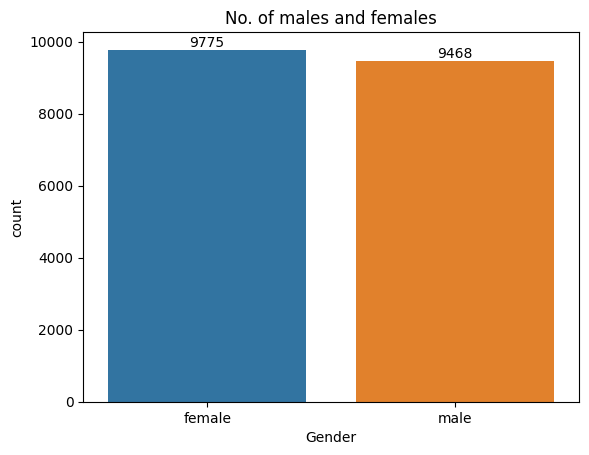

In [14]:
#count number of female and male student.
ax = sns.countplot(x="Gender",data = df)
plt.title("No. of males and females")
for bars in ax.containers:
    ax.bar_label(bars)
    

**From the above graph we can see that number of females are more as compair to number of males**

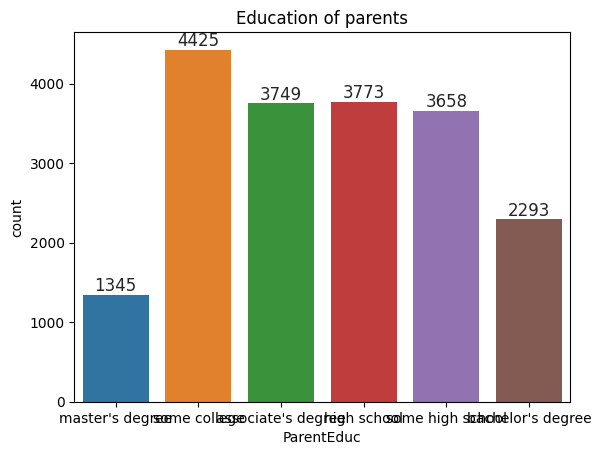

In [15]:
#count no.of parents did education in which field.
ax = sns.countplot(x="ParentEduc", data = df)
plt.title("Education of parents")
sns.set(rc={"figure.figsize":(21,4)})
for bars in ax.containers:
    ax.bar_label(bars)


**From the above graph we can see that most of the parents has completed only college.**

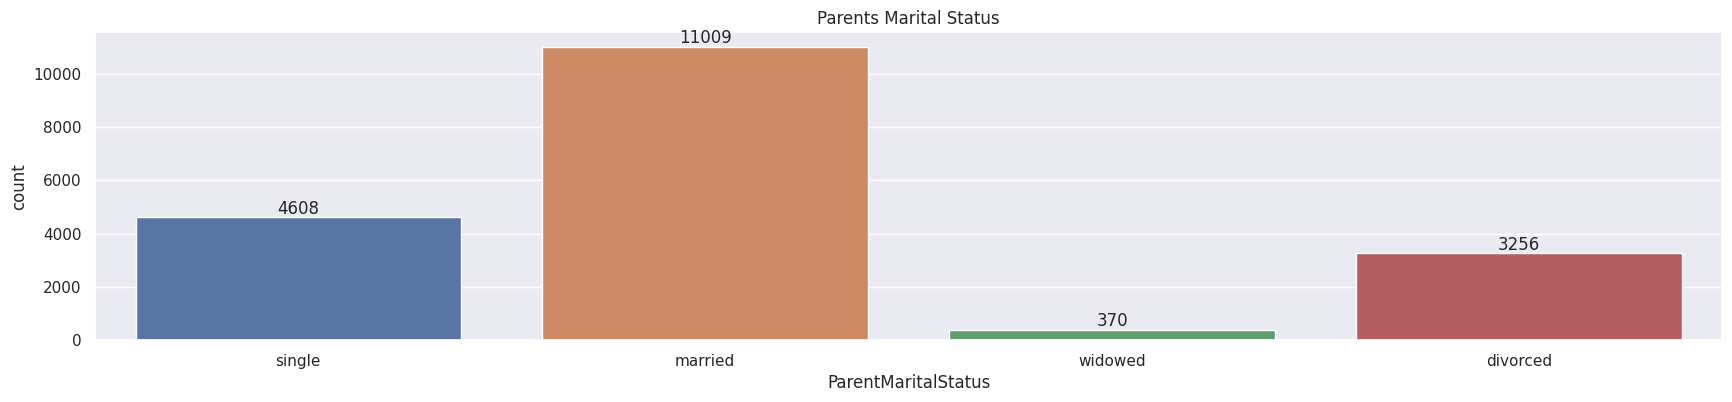

In [16]:
#count the ParentMaritalStatus 
ax = sns.countplot(x="ParentMaritalStatus",data = df)
plt.title("Parents Marital Status")
for bars in ax.containers:
    ax.bar_label(bars)

**From above we see that most of the parents are married and least of them are widowed.**

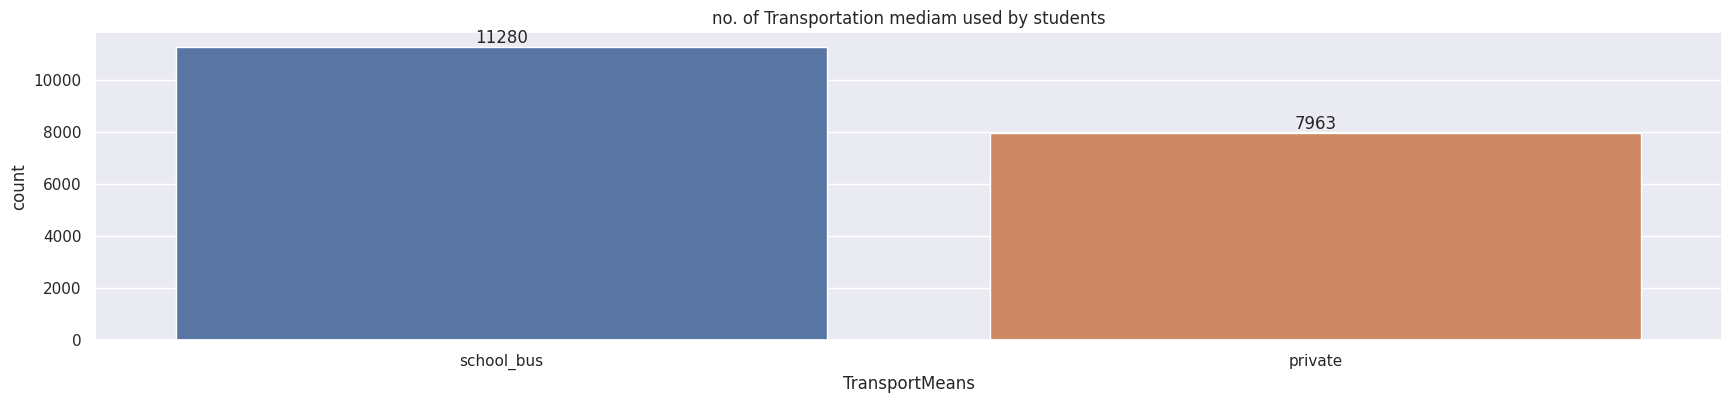

In [17]:
#count which transportation mediam is most used by students
ax=sns.countplot(x="TransportMeans", data =df)
plt.title("no. of Transportation mediam used by students")
sns.set(rc={"figure.figsize":(5,10)})
for bars in ax.containers:
    ax.bar_label(bars)

**Most of the students we school bus to travel**

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


Text(0.5, 1.0, 'Impart of parents education on students score')

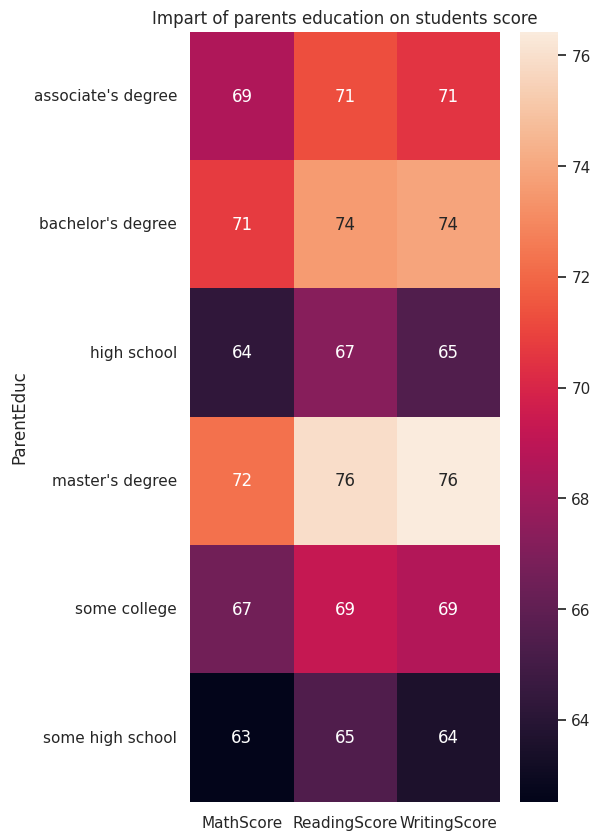

In [18]:
#Impart of parents education on students score
parent_edu_impact = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(parent_edu_impact)
sns.heatmap(data = parent_edu_impact,annot= True)
sns.set(rc={"figure.figsize":(6,4)})
plt.title("Impart of parents education on students score")

**From the above chart we have concluded that the education of parent have a good impact on student scores.**

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'divorced'),
  Text(0, 1.5, 'married'),
  Text(0, 2.5, 'single'),
  Text(0, 3.5, 'widowed')])

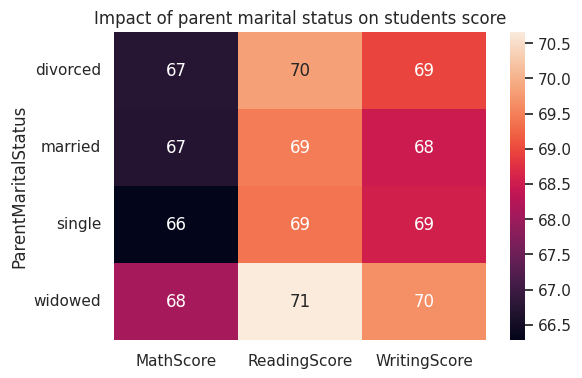

In [19]:
# impact of parent marital status on students score.
parent_mar_impact = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(parent_mar_impact)
sns.heatmap(data = parent_mar_impact,annot= True)
sns.set(rc={"figure.figsize":(6,4)})
plt.title("Impact of parent marital status on students score")
plt.yticks(rotation = 0)

****From the above chart we have conclude that marital status of parents does not have big impact on students score.****

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.593871     68.774244     67.021334
regularly      67.636547     69.950791     69.641439
sometimes      66.461143     69.438085     68.279568


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'never'), Text(0, 1.5, 'regularly'), Text(0, 2.5, 'sometimes')])

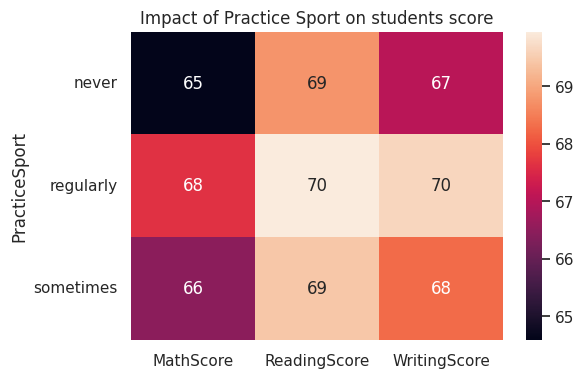

In [20]:
# impact of Practice Sports on students score.
PracticeSport_impact = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(PracticeSport_impact)
sns.heatmap(data = PracticeSport_impact,annot= True)
sns.set(rc={"figure.figsize":(6,4)})
plt.title("Impact of Practice Sport on students score")
plt.yticks(rotation = 0)

**From the above chat we have concluded that their is no impact of sports on students score.**

In [21]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.957425     69.775598     68.793123
< 5             64.605650     68.431518     67.359227
> 10            68.878382     70.545644     69.998811


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, '5 - 10'), Text(0, 1.5, '< 5'), Text(0, 2.5, '> 10')])

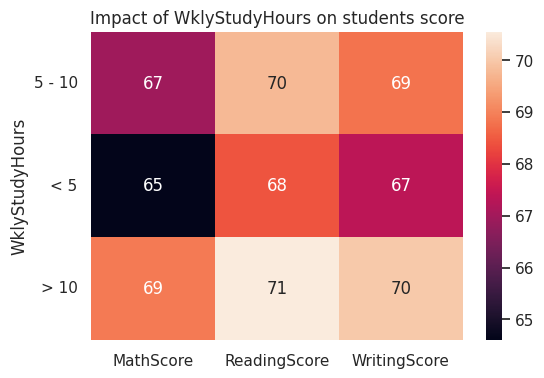

In [22]:
# impact of WklyStudyHours on students score.
WklyStudyHours_impact = df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(WklyStudyHours_impact)
sns.heatmap(data = WklyStudyHours_impact,annot= True)
sns.set(rc={"figure.figsize":(6,4)})
plt.title("Impact of WklyStudyHours on students score")
plt.yticks(rotation = 0)

**From the above chart we see that their is no impact of study hours on students result.**

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0           66.789262     69.845961     68.961867
1           66.579434     69.409839     68.416127
2           66.472631     69.433282     68.486041
3           66.800097     69.620039     68.787996
4           66.356665     69.433865     68.502831
5           66.940211     69.702227     68.583822
6           67.568182     69.170455     68.301136
7           67.557895     70.973684     70.310526


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7')])

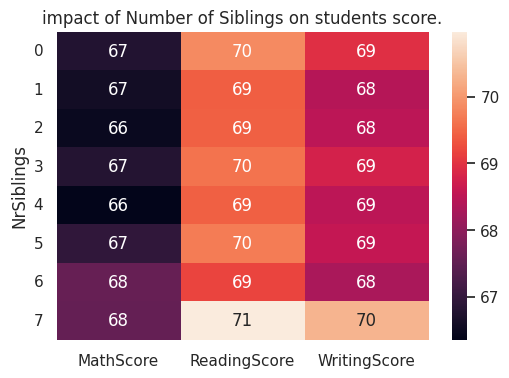

In [23]:
# impact of Number of Siblings on students score.
NrSiblings_impact = df.groupby("NrSiblings").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(NrSiblings_impact)
sns.heatmap(data = NrSiblings_impact,annot= True)
sns.set(rc={"figure.figsize":(6,4)})
plt.title("impact of Number of Siblings on students score.")
plt.yticks(rotation = 0)

**From the above chart we see that their is no impact of number of siblings on students result.**

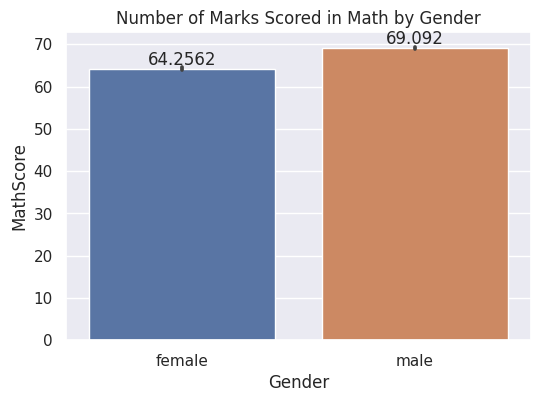

In [24]:
#Number of Marks Scored in Math by Gender.
ax = sns.barplot(x="Gender", y="MathScore", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Marks Scored in Math by Gender")
sns.set(rc={"figure.figsize":(4,10)})

**From the above bar graph we can see that highest marks in maths scored by male**

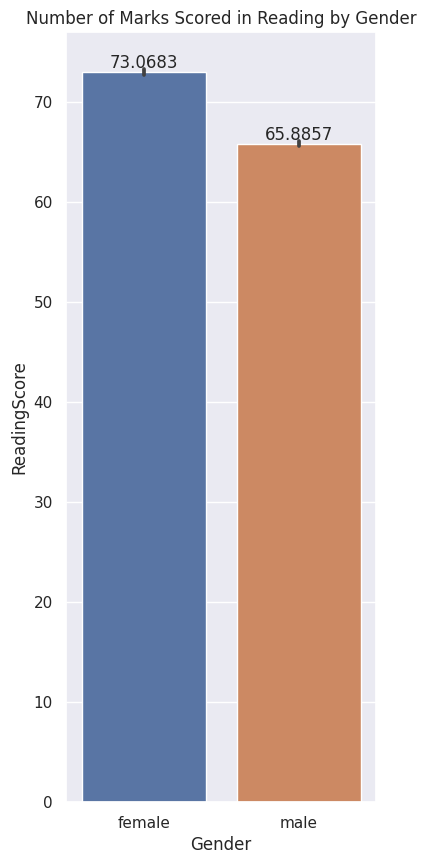

In [25]:
#Number of Marks Scored in Reading by Gender.
ax = sns.barplot(x="Gender", y="ReadingScore", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Marks Scored in Reading by Gender")
sns.set(rc={"figure.figsize":(4,10)})

**From the above bar graph we can see that highest marks in reading scored by female**

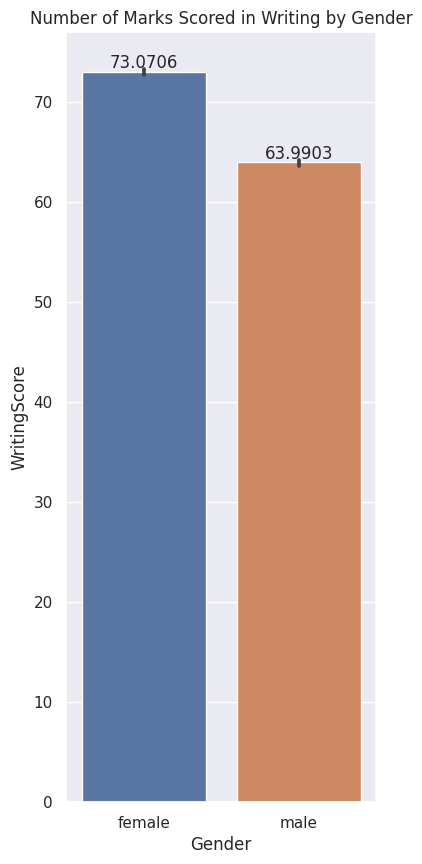

In [26]:
#Number of Marks Scored in Writing by Gender.
ax = sns.barplot(x="Gender", y="WritingScore", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Marks Scored in Writing by Gender")
sns.set(rc={"figure.figsize":(4,10)})

**From the above bar graph we can see that highest marks in writing scored by female**

## Check outliers

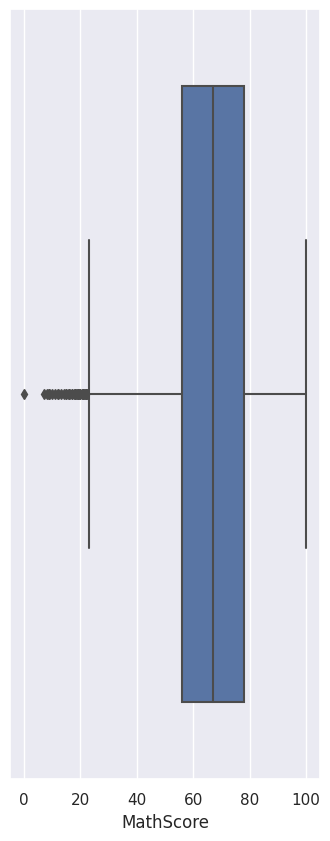

In [27]:
#outlier for MathScore
sns.boxplot(x="MathScore", data = df)
sns.set(rc={"figure.figsize":(6,6)})

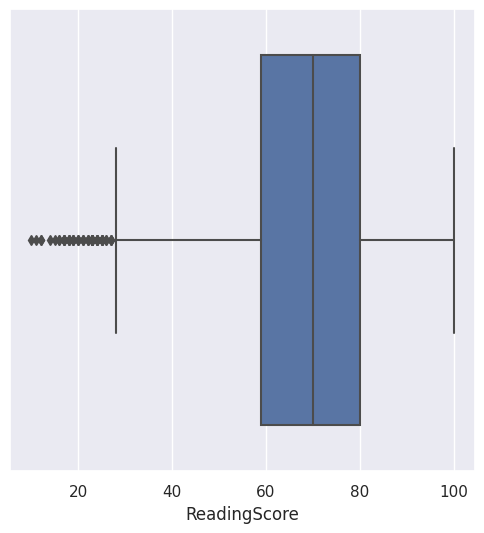

In [28]:
#outlier for ReadingScore
sns.boxplot(x="ReadingScore", data = df)
sns.set(rc={"figure.figsize":(6,6)})

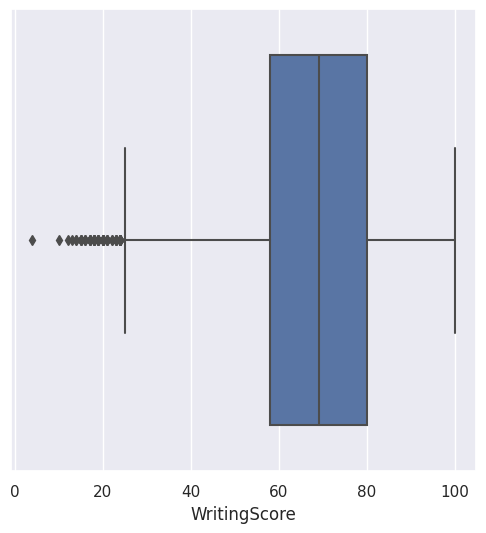

In [29]:
#outlier for WritingScore
sns.boxplot(x="WritingScore", data = df)
sns.set(rc={"figure.figsize":(6,6)})

**From the above 3 graphs we have concluded that their are some outliers in all 3 data**

In [30]:
#ethnic groups uniquw values
EG = df["EthnicGroup"].unique()
print(EG)

['group B' 'group C' 'group D' 'group A' 'group E']


**Their are total 5 groups.**

## Pie charts

Text(0.5, 1.0, 'Distribution of Ethnic Groups')

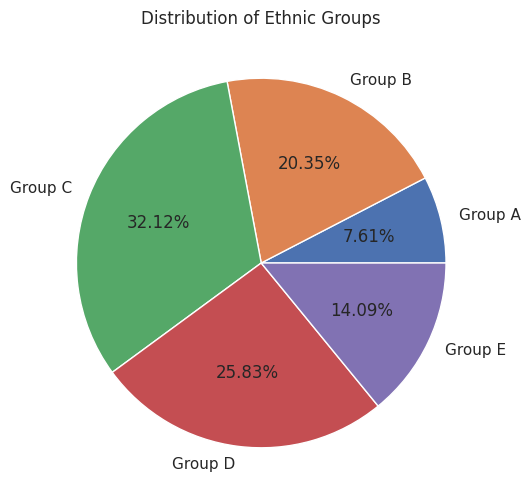

In [31]:
#Distribution of EthnicGroup using pie chart
# Counting the number of rows for each ethnic group
group_A_count = df[df["EthnicGroup"] == "group A"].shape[0]
group_B_count = df[df["EthnicGroup"] == "group B"].shape[0]
group_C_count = df[df["EthnicGroup"] == "group C"].shape[0]
group_D_count = df[df["EthnicGroup"] == "group D"].shape[0]
group_E_count = df[df["EthnicGroup"] == "group E"].shape[0]

# Creating lists for labels and counts
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]
counts = [group_A_count, group_B_count, group_C_count, group_D_count, group_E_count]

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")

**From above pie chart we have conclude that most of the students are in Group C**

# Conclusion

In conclusion, our analysis reveals several noteworthy insights about student performance and demographics. Firstly, there's a higher representation of female students in the class compared to males. Secondly, students predominantly favor school bus transportation over private modes. Thirdly, the data suggests a positive relationship between parental education levels and student scores, while parental marital status and sports participation show no significant impact on academic performance. Additionally, gender differences are apparent, with females excelling in reading and writing, while males tend to outperform in math. Finally, a substantial portion of the student body belongs to ethnic group C, indicating a diverse student population. These findings provide valuable insights into the dynamics of student performance and demographic composition within the class.